### SVM Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('datasets\Loan-Approval-Prediction-Dataset\loan_approval_dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\3563746929.py:1: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv('datasets\Loan-Approval-Prediction-Dataset\loan_approval_dataset.csv')


In [3]:
print(df.shape)
df.columns = df.columns.str.strip()
# drop the 'Loan_ID' column as it is not useful for prediction
df.drop(columns=['loan_id'], inplace=True)
df.head()

(4269, 13)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Factorization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [5]:
df["education"] = pd.factorize(df["education"])[0]
df["self_employed"] = pd.factorize(df["self_employed"])[0]
print(df["loan_status"].value_counts())
df["loan_status"] = pd.factorize(df["loan_status"])[0]
print(df["loan_status"].value_counts())

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
loan_status
0    2656
1    1613
Name: count, dtype: int64


## Normalization

In [6]:
mx = MinMaxScaler()
for col in df.columns:
    df[col] = mx.fit_transform(df[[col]])

In [7]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0
1,0.0,1.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0
2,0.6,0.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1.0
3,0.6,0.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1.0
4,1.0,1.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0


## Data Splitting

In [8]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# Model Training

## SVM Model

In [10]:
model_svm = SVC(kernel='poly', degree=4, C=4.0)

In [11]:
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 94.4965%


## Logistic Regression Model

In [13]:
model_logistic = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2', C=1.0)

In [14]:
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 92.1546%


## Decision Tree Model

In [16]:
model_random_forest = DecisionTreeClassifier(max_depth=20, random_state=42, criterion='entropy', splitter='best')

In [17]:
model_random_forest.fit(X_train, y_train)
y_pred = model_random_forest.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 98.0094%


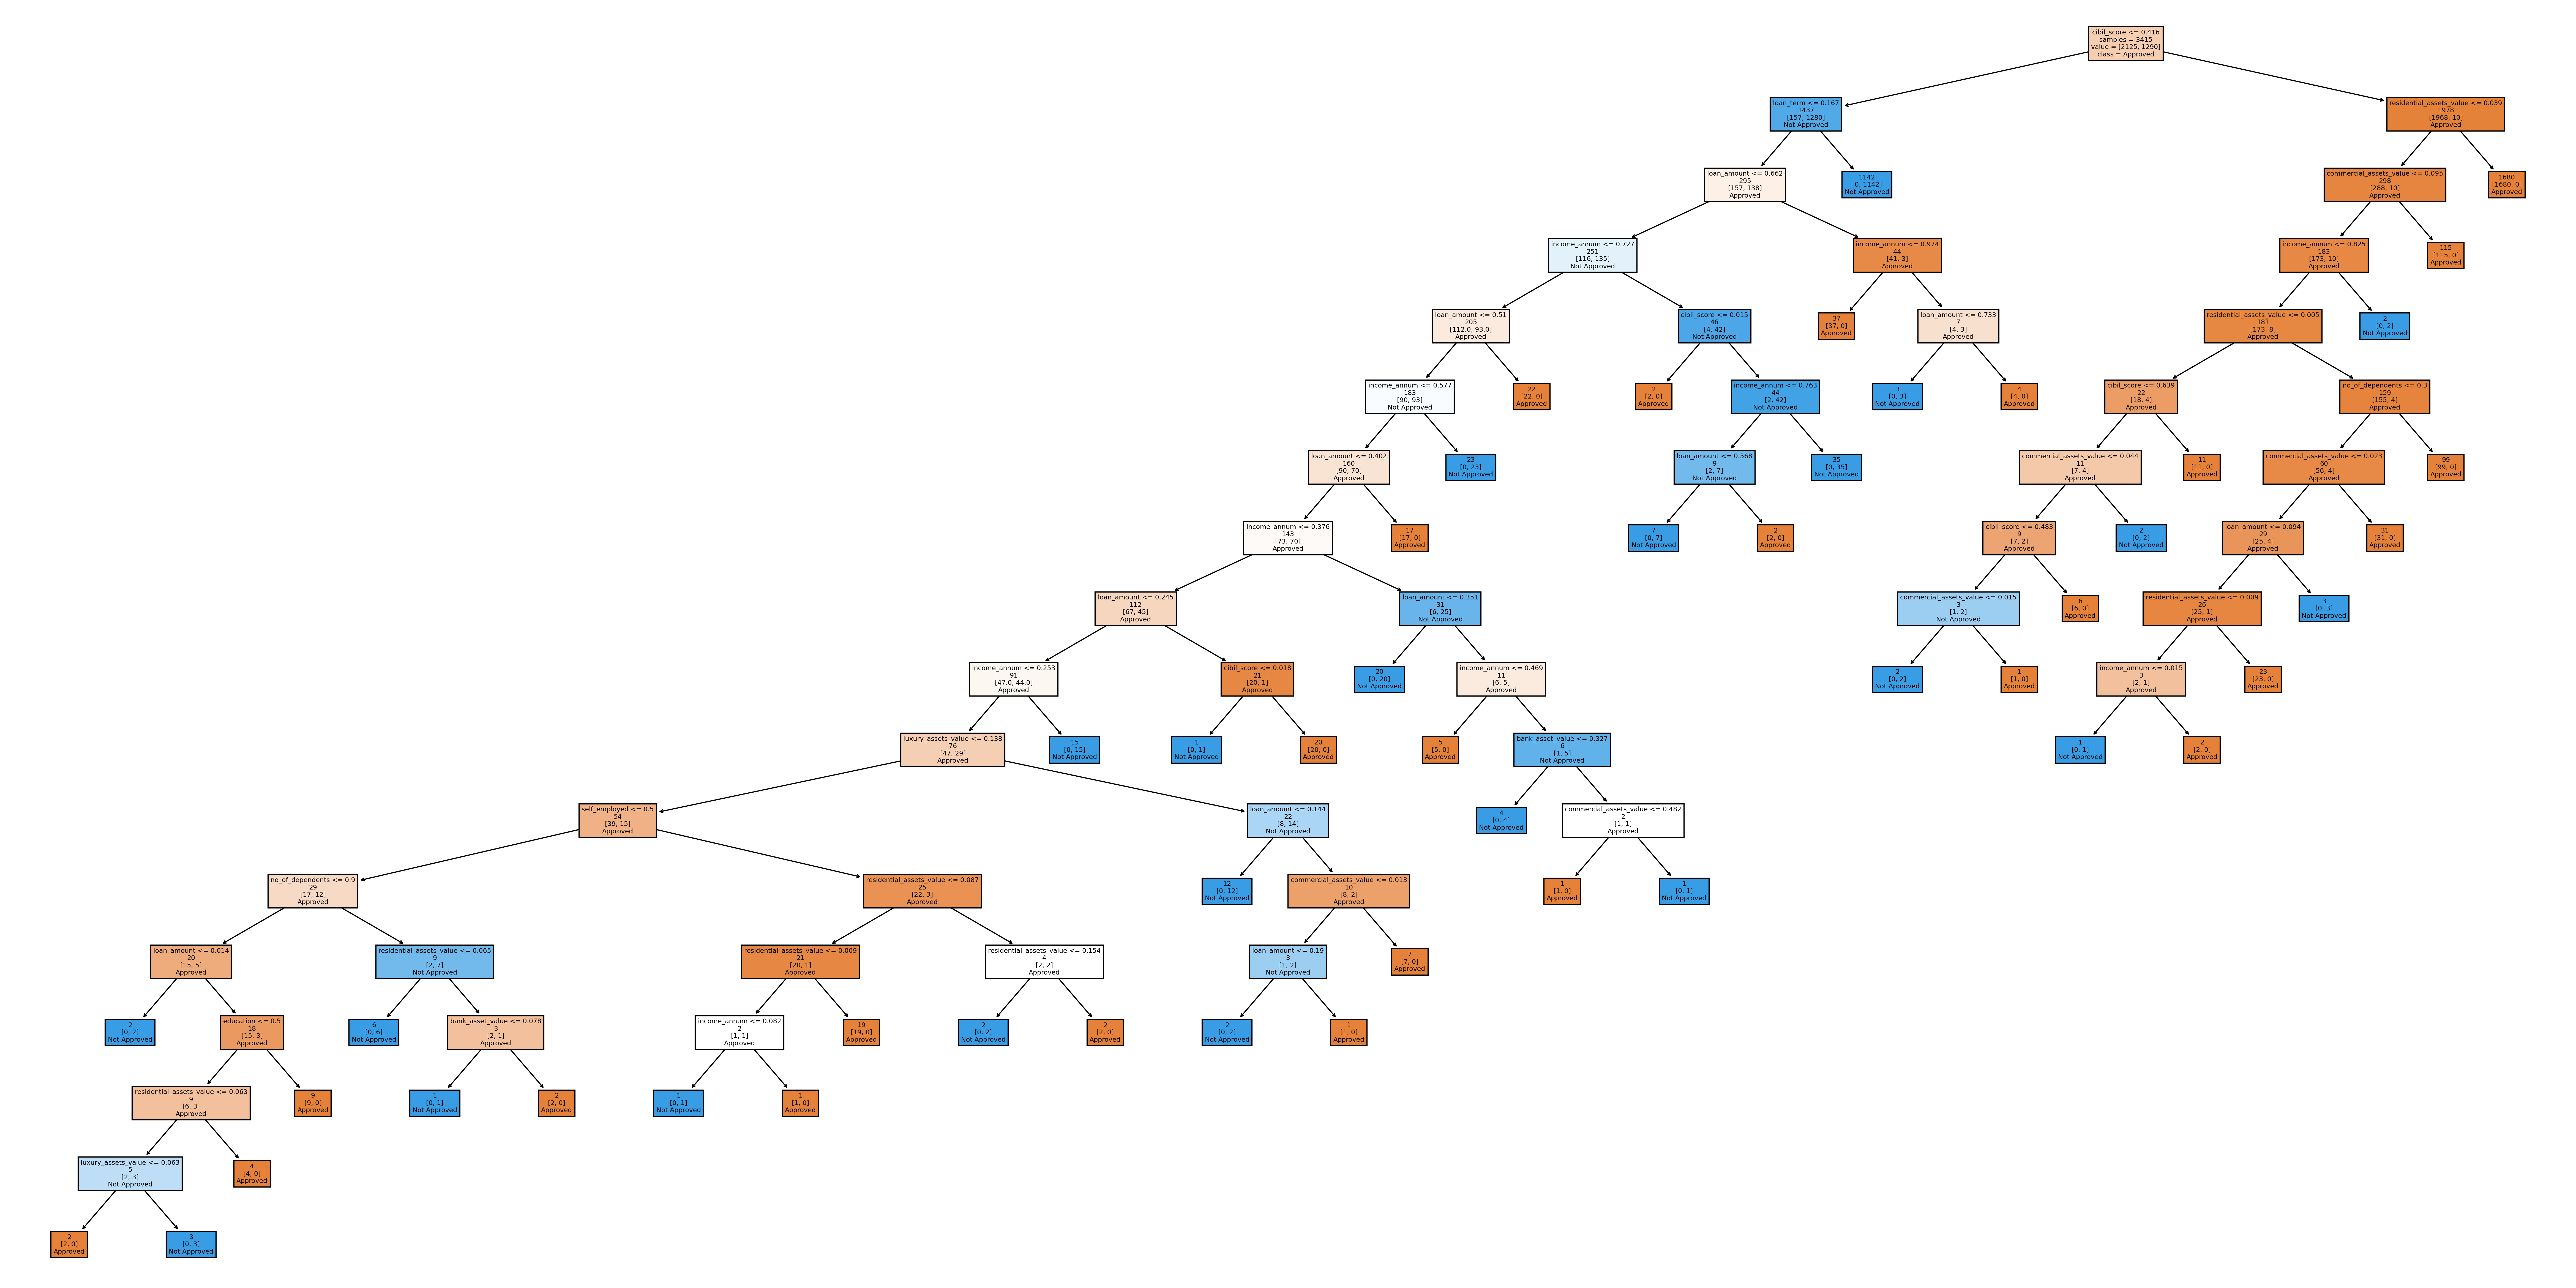

In [20]:
plt.figure(figsize=(40, 20), dpi=300)
plot_tree(
    model_random_forest,
    feature_names=X.columns,
    class_names=["Approved", "Not Approved"],
    filled=True,
    impurity=False,
    label="root"
)
plt.savefig("Trees/decision_tree_ml_loan.png", bbox_inches="tight")
# plt.close()